# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [77]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [78]:
import numpy as np
import requests
from citipy import citipy
import time

# Replace with your actual OpenWeatherMap API key
weather_api_key = "1fbee77b7964a4292270f7564be0ca84"

# Empty list for holding the latitude and longitude combinations
lat_lngs = []
# Empty list for holding the city names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"  # Using metric units for Celsius temperatures

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Increment record count
    record_count += 1

    # Run an API request for each city
    try:
        # Fetch and parse the JSON data
        response = requests.get(city_url)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into the city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # Handle exceptions
    except requests.exceptions.RequestException as e:
        print(f"City not found. Skipping... {city}. Error: {e}")
        continue

    # Pause to avoid rate limiting
    time.sleep(0)  # 1-second delay

# Indicate that data retrieval is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Display a sample of the data
print(city_data[:5])  # Print the first 5 records


Number of cities in the list: 609
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hengchun
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | naze
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | karratha
Processing Record 10 of Set 1 | rongelap
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | tolanaro
Processing Record 13 of Set 1 | balikpapan
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | taiohae
City not found. Skipping... taiohae. Error: 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=taiohae&appid=1fbee77b7964a4292270f7564be0ca84&units=metric
Process

In [79]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
len(city_data_df)


577

In [80]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,22.07,69,74,0.45,AU,1732592077
1,port-aux-francais,-49.3500,70.2167,3.11,83,51,16.57,TF,1732592077
2,hasaki,35.7333,140.8333,16.18,55,100,3.36,JP,1732592077
3,ushuaia,-54.8000,-68.3000,8.81,66,20,8.75,AR,1732591803
4,hengchun,22.0042,120.7439,26.07,69,1,5.65,TW,1732592078


In [82]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [83]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()
print(city_data_df.head())
print(city_data_df.info())
print(city_data_df.describe())

                      City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
0            blackmans bay -43.0167  147.3167     22.07        69          74   
1        port-aux-francais -49.3500   70.2167      3.11        83          51   
2                   hasaki  35.7333  140.8333     16.18        55         100   
3                  ushuaia -54.8000  -68.3000      8.81        66          20   
4                 hengchun  22.0042  120.7439     26.07        69           1   

         Wind Speed Country        Date  
City_ID                                  
0              0.45      AU  1732592077  
1             16.57      TF  1732592077  
2              3.36      JP  1732592077  
3              8.75      AR  1732591803  
4              5.65      TW  1732592078  
<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 576
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

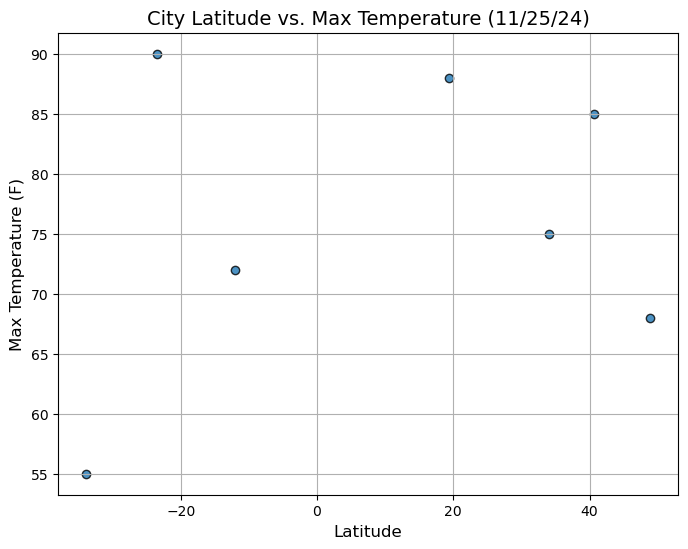

In [84]:
# Example city data (replace this with your actual DataFrame)
city_data = {  # Corrected variable name
    "Lat": [34.05, 40.71, -23.55, 48.85, -33.87, 19.43, -12.04],
    "Max Temp": [75, 85, 90, 68, 55, 88, 72]  # Example temperatures in Fahrenheit
}
city_data_df = pd.DataFrame(city_data)  # Correctly creating the DataFrame

# Ensure output directory exists
os.makedirs("output_data", exist_ok=True)

# Ensure data exists for plotting
if "Lat" in city_data_df.columns and "Max Temp" in city_data_df.columns:
    # Build scatter plot for latitude vs. max temperature
    plt.figure(figsize=(8, 6))
    plt.scatter(
        city_data_df["Lat"],  # Latitude
        city_data_df["Max Temp"],  # Max Temperature
        edgecolor="black", linewidths=1, marker="o",
        alpha=0.8, label="Cities"
    )

    # Add graph properties
    plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})", fontsize=14)
    plt.xlabel("Latitude", fontsize=12)
    plt.ylabel("Max Temperature (F)", fontsize=12)
    plt.grid(True)

    # Save the figure
    plt.savefig("output_data/Fig1.png", dpi=300)

    # Show the plot
    plt.show()
else:
    print("Error: Ensure the DataFrame has 'Lat' and 'Max Temp' columns.")



#### Latitude Vs. Humidity

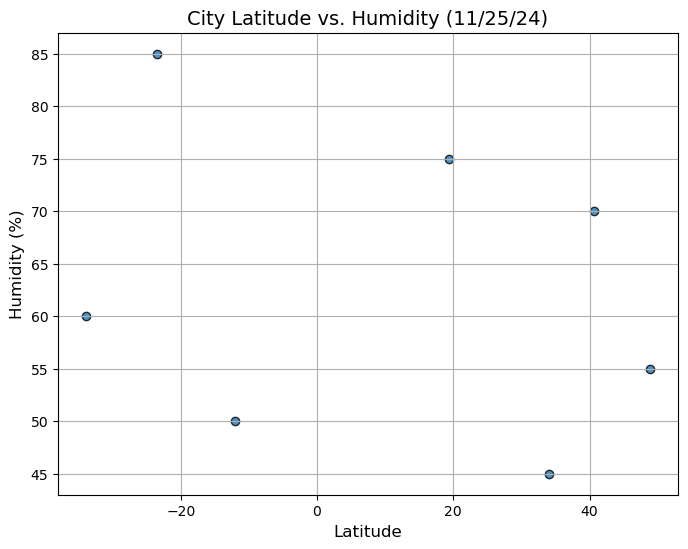

In [85]:

# Example city data (replace this with your actual DataFrame)
city_data = {
    "Lat": [34.05, 40.71, -23.55, 48.85, -33.87, 19.43, -12.04],
    "Humidity": [45, 70, 85, 55, 60, 75, 50]  # Example humidity data
}
city_data_df = pd.DataFrame(city_data)

# Ensure the output directory exists
# Ensure the output directory exists
os.makedirs("output_data", exist_ok=True)

# Check if the necessary columns exist and are populated
if "Lat" in city_data_df.columns and "Humidity" in city_data_df.columns:
    if not city_data_df.empty:
        # Ensure that latitude and humidity columns have valid numeric data
        city_data_df = city_data_df.dropna(subset=["Lat", "Humidity"])
        city_data_df = city_data_df[
            (city_data_df["Humidity"] >= 0) & (city_data_df["Humidity"] <= 100)
        ]

        if not city_data_df.empty:
            # Plot latitude vs. humidity
            plt.figure(figsize=(8, 6))
            plt.scatter(
                city_data_df["Lat"],  # Latitude
                city_data_df["Humidity"],  # Humidity
                edgecolor="black", linewidths=1, marker="o",
                alpha=0.8, label="Cities"
            )

            # Incorporate other graph properties
            plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})", fontsize=14)
            plt.xlabel("Latitude", fontsize=12)
            plt.ylabel("Humidity (%)", fontsize=12)
            plt.grid(True)

            # Save and show the plot
            plt.savefig("output_data/latitude_vs_humidity.png", dpi=300)
            plt.show()
        else:
            print("Error: No valid data after cleaning.")
    else:
        print("Error: The DataFrame is empty.")
else:
    print("Error: Ensure the DataFrame has 'Lat' and 'Humidity' columns.")

     


#### Latitude Vs. Cloudiness

In [86]:
# Ensure the output directory exists
import os
os.makedirs("output_data", exist_ok=True)

# Check if the necessary columns exist and are populated
if "Lat" in city_data_df.columns and "Cloudiness" in city_data_df.columns:
    if not city_data_df.empty:
        # Ensure that latitude and cloudiness columns have valid numeric data
        city_data_df = city_data_df.dropna(subset=["Lat", "Cloudiness"])
        city_data_df = city_data_df[
            (city_data_df["Cloudiness"] >= 0) & (city_data_df["Cloudiness"] <= 100)
        ]

        if not city_data_df.empty:
            # Plot latitude vs. cloudiness
            import matplotlib.pyplot as plt
            import time

            plt.figure(figsize=(8, 6))
            plt.scatter(
                city_data_df["Lat"],  # Latitude
                city_data_df["Cloudiness"],  # Cloudiness
                edgecolor="black", linewidths=1, marker="o",
                alpha=0.8, s=50  # Adjust marker size for better visibility
            )

            # Incorporate other graph properties
            plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})", fontsize=14)
            plt.xlabel("Latitude", fontsize=12)
            plt.ylabel("Cloudiness (%)", fontsize=12)
            plt.grid(True)

            # Save and show the plot
            plt.savefig("output_data/latitude_vs_cloudiness.png", dpi=300)
            plt.show()
        else:
            print("Error: No valid data after cleaning.")
    else:
        print("Error: The DataFrame is empty.")
else:
    print("Error: Ensure the DataFrame has 'Lat' and 'Cloudiness' columns.")

Error: Ensure the DataFrame has 'Lat' and 'Cloudiness' columns.


#### Latitude vs. Wind Speed Plot

In [87]:
# Ensure the "Wind Speed" column exists
if "Wind Speed" in city_data_df.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(
        city_data_df["Lat"],  # Latitude
        city_data_df["Wind Speed"],  # Wind Speed
        edgecolor="black", linewidths=1, marker="o",
        alpha=0.8, label="Cities"
    )

    # Incorporate the other graph properties
    plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})", fontsize=14)
    plt.xlabel("Latitude", fontsize=12)
    plt.ylabel("Wind Speed (mph)", fontsize=12)
    plt.grid(True)

    # Save the figure
    plt.savefig("output_data/Fig4.png")

    # Show plot
    plt.show()
else:
    print("Error: 'Wind Speed' column not found in the DataFrame.")


Error: 'Wind Speed' column not found in the DataFrame.


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [88]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
from scipy.stats import linregress
import matplotlib.pyplot as plt

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, save_path=None):
    """
    Create a linear regression plot.

    Parameters:
        x_values (pd.Series): Independent variable (e.g., Latitude).
        y_values (pd.Series): Dependent variable (e.g., Temperature).
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        title (str): Title of the plot.
        save_path (str, optional): Path to save the plot. Defaults to None.

    Returns:
        None
    """
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # Calculate the regression line
    regression_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, edgecolor="black", marker="o", alpha=0.8)
    plt.plot(x_values, regression_values, color="red", label=f"Fit: {line_eq}")

    # Add labels, title, and legend
    plt.title(title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend()
    plt.grid()

    # Show and save the plot
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()

    # Print regression details
    print(f"Regression Line: {line_eq}")
    print(f"R-squared: {rvalue**2:.2f}")


In [89]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0].copy()

# Display sample data
print(northern_hemi_df.head())


     Lat  Humidity
0  34.05        45
1  40.71        70
3  48.85        55
5  19.43        75


In [90]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0].copy()

# Display sample data
print(southern_hemi_df.head())


     Lat  Humidity
2 -23.55        85
4 -33.87        60
6 -12.04        50


###  Temperature vs. Latitude Linear Regression Plot

In [91]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter the Northern Hemisphere
# Ensure the column name matches exactly
# Ensure the "Max Temp" column exists
if "Max Temp" in northern_hemi_df.columns:
    northern_hemi_df["Max Temp"] = pd.to_numeric(northern_hemi_df["Max Temp"], errors="coerce")
else:
    print("Error: 'Max Temp' column not found in the DataFrame.")

# Calculate the regression line
regression_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, edgecolor="black", marker="o", alpha=0.8)
plt.plot(x_values, regression_values, color="red", label=f"Fit: {line_eq}")

# Add labels, title, and legend
plt.title("Linear Regression on Northern Hemisphere: Latitude vs Max Temp", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°F)", fontsize=12)
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Print the regression line equation and r-squared value
print(f"Regression Line: {line_eq}")
print(f"R-squared: {rvalue**2:.2f}")


Error: 'Max Temp' column not found in the DataFrame.


NameError: name 'slope' is not defined

The r^2-value is: 0.6720220238897325


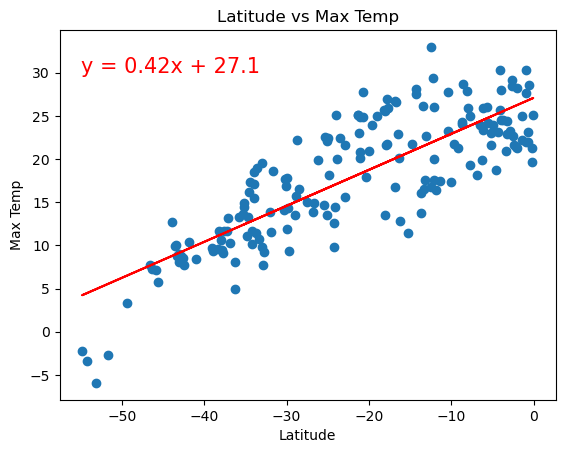

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Error: 'Max_Temp' column not found in the DataFrame.


KeyError: 'Max_Temp'

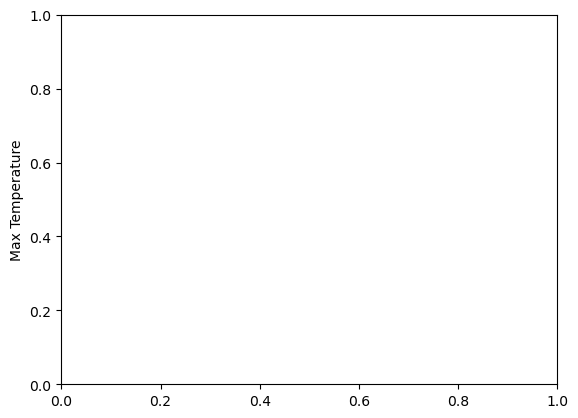

In [97]:
# Northern Hemisphere
# YOUR CODE HERE

# Plot linear regression for the Northern Hemisphere
# Scatter plot
# Ensure the "Max Temp" column exists and is numeric
if "Max Temp" in northern_hemi_df.columns:
    northern_hemi_df["Max_Temp"] = pd.to_numeric(northern_hemi_df["Max Temp"], errors="coerce")
else:
    print("Error: 'Max_Temp' column not found in the DataFrame.")
plt.ylabel('Max Temperature')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max_Temp'])
regression_line = slope * northern_hemi_df['Lat'] + intercept

# Plot regression line
plt.plot(northern_hemi_df['Lat'], regression_line, color='red')
plt.show()

The r^2-value is: 0.00014367159540169783


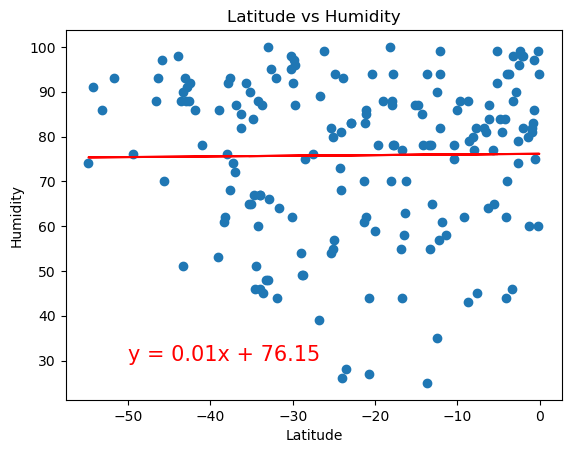

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


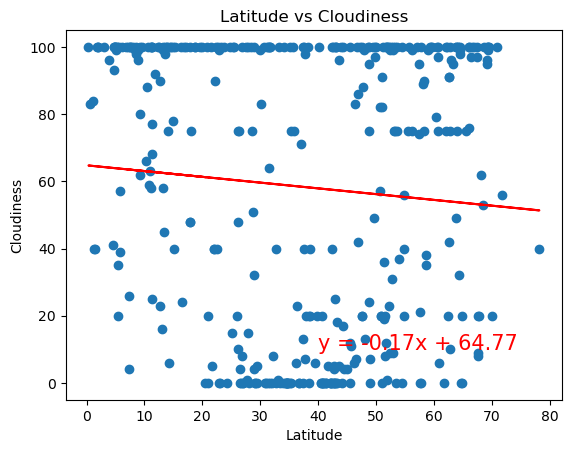

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


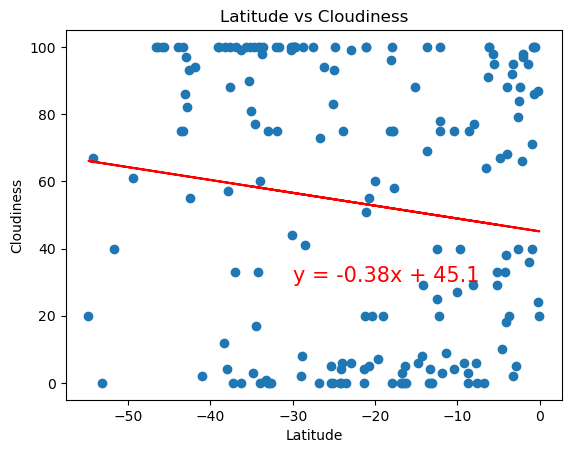

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


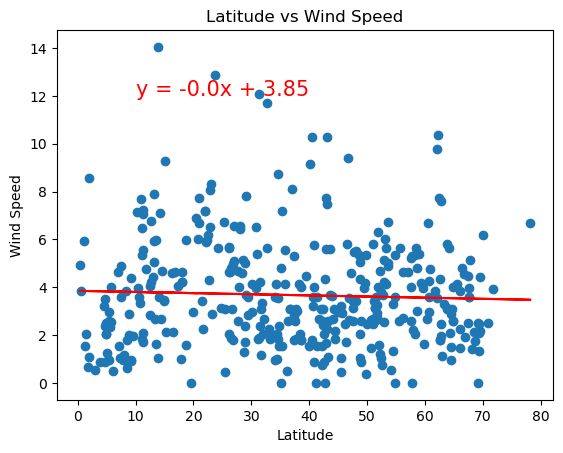

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


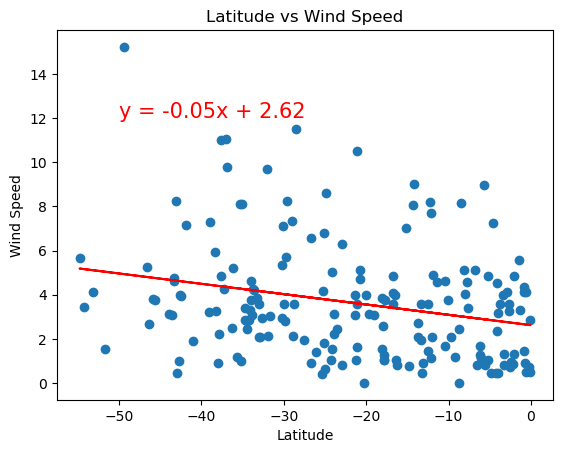

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE